### Churn Means the customer who left the company

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [9]:
df = pd.read_csv('customer_churn.csv')
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [17]:
medium_ttl = df['TotalCharges'].median()
df['TotalCharges'] = df['TotalCharges'].fillna(medium_ttl)
df['TotalCharges'].isna().any()

False

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [27]:
df.replace('No internet service', 'No', inplace=True)

In [29]:
#Function to print the unique values of the column in dataframe with non numeric data type only
def print_column_unique(df):
    for column in df:
        if df[column].dtype == 'object':
            print(f' {column}: {df[column].unique()}')

In [31]:
print_column_unique(df)

 gender: ['Female' 'Male']
 Partner: ['Yes' 'No']
 Dependents: ['No' 'Yes']
 PhoneService: ['No' 'Yes']
 MultipleLines: ['No phone service' 'No' 'Yes']
 InternetService: ['DSL' 'Fiber optic' 'No']
 OnlineSecurity: ['No' 'Yes']
 OnlineBackup: ['Yes' 'No']
 DeviceProtection: ['No' 'Yes']
 TechSupport: ['No' 'Yes']
 StreamingTV: ['No' 'Yes']
 StreamingMovies: ['No' 'Yes']
 Contract: ['Month-to-month' 'One year' 'Two year']
 PaperlessBilling: ['Yes' 'No']
 PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
 Churn: ['No' 'Yes']


In [33]:
df.replace('No internet service', 'No', inplace=True)

In [35]:
print_column_unique(df)

 gender: ['Female' 'Male']
 Partner: ['Yes' 'No']
 Dependents: ['No' 'Yes']
 PhoneService: ['No' 'Yes']
 MultipleLines: ['No phone service' 'No' 'Yes']
 InternetService: ['DSL' 'Fiber optic' 'No']
 OnlineSecurity: ['No' 'Yes']
 OnlineBackup: ['Yes' 'No']
 DeviceProtection: ['No' 'Yes']
 TechSupport: ['No' 'Yes']
 StreamingTV: ['No' 'Yes']
 StreamingMovies: ['No' 'Yes']
 Contract: ['Month-to-month' 'One year' 'Two year']
 PaperlessBilling: ['Yes' 'No']
 PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
 Churn: ['No' 'Yes']


In [37]:
df.replace('No phone service', 'No', inplace=True)

In [39]:
print_column_unique(df)

 gender: ['Female' 'Male']
 Partner: ['Yes' 'No']
 Dependents: ['No' 'Yes']
 PhoneService: ['No' 'Yes']
 MultipleLines: ['No' 'Yes']
 InternetService: ['DSL' 'Fiber optic' 'No']
 OnlineSecurity: ['No' 'Yes']
 OnlineBackup: ['Yes' 'No']
 DeviceProtection: ['No' 'Yes']
 TechSupport: ['No' 'Yes']
 StreamingTV: ['No' 'Yes']
 StreamingMovies: ['No' 'Yes']
 Contract: ['Month-to-month' 'One year' 'Two year']
 PaperlessBilling: ['Yes' 'No']
 PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
 Churn: ['No' 'Yes']


In [47]:
import warnings
warnings.filterwarnings('ignore')  # Suppress all warnings

In [49]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [43]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0


In [53]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


In [55]:
#Function to print the entire unique value in data frame

def print_unique_values(df):
    for column in df:
        print(f'{column} : {df[column].unique()}')

In [57]:
print_unique_values(df)

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [59]:
df = pd.get_dummies(data=df, columns=['InternetService', 'Contract', 'PaymentMethod'])

In [61]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [63]:
print_unique_values(df)

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.01388889 0.47222222 0.02777778 0.625      0.11111111 0.30555556
 0.13888889 0.38888889 0.86111111 0.18055556 0.22222222 0.80555556
 0.68055556 0.34722222 0.95833333 0.72222222 0.98611111 0.29166667
 0.16666667 0.41666667 0.65277778 1.         0.23611111 0.375
 0.06944444 0.63888889 0.15277778 0.97222222 0.875      0.59722222
 0.20833333 0.83333333 0.25       0.91666667 0.125      0.04166667
 0.43055556 0.69444444 0.88888889 0.77777778 0.09722222 0.58333333
 0.48611111 0.66666667 0.40277778 0.90277778 0.52777778 0.94444444
 0.44444444 0.76388889 0.51388889 0.5        0.56944444 0.08333333
 0.05555556 0.45833333 0.93055556 0.31944444 0.79166667 0.84722222
 0.19444444 0.27777778 0.73611111 0.55555556 0.81944444 0.33333333
 0.61111111 0.26388889 0.75       0.70833333 0.36111111 0.
 0.54166667]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tec

In [65]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.013889,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,0.472222,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0,0.027778,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0,0.625000,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,1,0,0,0,0.027778,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [67]:
df.shape

(7043, 27)

In [73]:
class_0, class_1 = df.Churn.value_counts()
class_0, class_1

(5174, 1869)

In [77]:
df_class_0 = df[df['Churn'] == 0]
df_class_1 = df[df['Churn'] == 1]

In [81]:
df_class_1.shape

(1869, 27)

In [87]:
df_class_0_under = df_class_0.sample(class_1)
df_under_sample = pd.concat([df_class_0_under, df_class_1], axis=0)
df_under_sample.shape

(3738, 27)

In [95]:
print_unique_values(df_under_sample)

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [0 1]
Dependents : [0 1]
tenure : [0.06944444 0.36111111 0.98611111 0.69444444 0.16666667 0.91666667
 0.58333333 0.48611111 0.23611111 0.08333333 0.86111111 0.80555556
 0.26388889 0.95833333 1.         0.79166667 0.04166667 0.29166667
 0.83333333 0.66666667 0.27777778 0.25       0.125      0.11111111
 0.81944444 0.88888889 0.33333333 0.61111111 0.75       0.70833333
 0.18055556 0.43055556 0.45833333 0.625      0.34722222 0.01388889
 0.375      0.38888889 0.94444444 0.41666667 0.875      0.72222222
 0.73611111 0.30555556 0.97222222 0.02777778 0.90277778 0.20833333
 0.15277778 0.56944444 0.05555556 0.22222222 0.31944444 0.13888889
 0.76388889 0.40277778 0.44444444 0.09722222 0.47222222 0.65277778
 0.84722222 0.93055556 0.55555556 0.77777778 0.51388889 0.63888889
 0.59722222 0.52777778 0.68055556 0.19444444 0.54166667 0.5
 0.        ]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 

In [97]:
X = df_under_sample.drop('Churn', axis=1)
y = df_under_sample.Churn
y.shape

(3738,)

In [99]:
X.shape

(3738, 26)

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [103]:
X_train.shape

(2990, 26)

In [105]:
from tensorflow import keras

In [107]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6255 - loss: 0.6474
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7631 - loss: 0.5094
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7510 - loss: 0.5046
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7698 - loss: 0.4857
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7698 - loss: 0.4880
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7602 - loss: 0.4928
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7732 - loss: 0.4744
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7848 - loss: 0.4667
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7710 - loss: 0.4692
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7483 - loss: 0.5010
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7770 - loss: 0.4666
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7676 - lo

In [109]:
model.evaluate(X_test, y_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7968 - loss: 0.4641


[0.48989561200141907, 0.7740641832351685]

In [39]:
y_test.shape

(1409,)

In [117]:
y_predicted = model.predict(X_test).reshape(-1)
y_predicted = (y_predicted > 0.5).astype(int) 

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [119]:
y_predicted[:10]

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0])

In [121]:
y_test[:10]

2766    0
6049    0
984     0
5945    0
5122    0
2526    1
2677    1
5039    1
5247    1
216     0
Name: Churn, dtype: int64

In [123]:
y_predicted[:10]

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0])

In [125]:
y_train[:10]

5665    0
5513    0
3248    1
1981    1
3885    0
3905    1
2578    1
53      1
5863    1
1781    0
Name: Churn, dtype: int64

In [127]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       377
           1       0.76      0.80      0.78       371

    accuracy                           0.77       748
   macro avg       0.77      0.77      0.77       748
weighted avg       0.77      0.77      0.77       748



In [129]:
cm = confusion_matrix(y_test, y_predicted)

<Axes: >

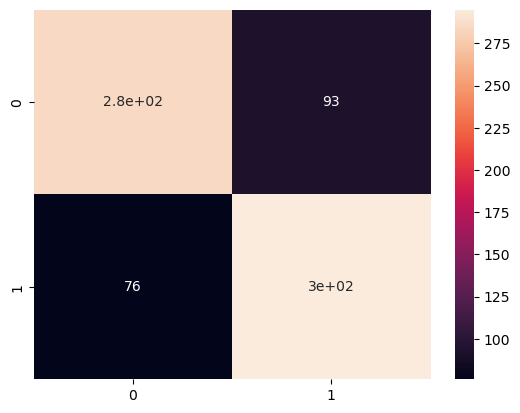

In [131]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [133]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       377
           1       0.76      0.80      0.78       371

    accuracy                           0.77       748
   macro avg       0.77      0.77      0.77       748
weighted avg       0.77      0.77      0.77       748



### Method Two - OVERSAMPLING
### Due to ineffecient compute resource I will just show how to do , over sampling

In [139]:
class_0, class_1

(5174, 1869)

In [155]:
df_class_0.shape
df_class_1_over = df_class_1.sample(class_0, replace=True)

In [172]:
class_0_over, class_1_over = df_over.Churn.value_counts()
class_0_over, class_1_over

(5174, 5174)

In [164]:
df_over = pd.concat([df_class_1_over, df_class_0], axis=0)
print_unique_values(df_over)

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [0 1]
Dependents : [0 1]
tenure : [0.06944444 0.01388889 0.13888889 0.02777778 0.16666667 0.33333333
 0.79166667 0.20833333 0.125      0.80555556 0.05555556 0.70833333
 0.19444444 0.55555556 0.22222222 0.54166667 0.75       0.04166667
 0.94444444 0.26388889 0.51388889 0.11111111 0.34722222 0.29166667
 0.68055556 0.38888889 0.09722222 0.30555556 0.59722222 0.73611111
 0.23611111 0.08333333 0.25       0.76388889 0.88888889 0.44444444
 0.15277778 0.18055556 0.61111111 0.5        0.98611111 0.41666667
 0.56944444 0.97222222 0.65277778 0.45833333 0.69444444 0.27777778
 0.63888889 0.84722222 0.90277778 0.58333333 0.43055556 0.47222222
 0.91666667 0.31944444 0.81944444 0.95833333 0.52777778 0.36111111
 0.72222222 0.40277778 0.375      0.77777778 0.48611111 0.83333333
 0.625      0.93055556 0.66666667 0.875      0.86111111 1.
 0.        ]
PhoneService : [1 0]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [0 1]
DeviceProtection : [0 1

In [182]:
X_over = df_over.drop('Churn', axis=1)
y_over = df_over.Churn

In [184]:
y_over.shape

(10348,)

In [186]:
X_over.shape

(10348, 26)

In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=5, stratify=y_over)

In [192]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6902 - loss: 0.5857
Epoch 2/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7615 - loss: 0.4876
Epoch 3/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7590 - loss: 0.4949
Epoch 4/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7676 - loss: 0.4843
Epoch 5/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7770 - loss: 0.4663
Epoch 6/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7671 - loss: 0.4715
Epoch 7/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7753 - loss: 0.4602
Epoch 8/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7663 - loss: 0.4777
Epoch 9/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7770 - loss: 0.4598
Epoch 10/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7820 - loss: 0.4553
Epoch 11/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7763 - loss: 0.4622
Epoch 12/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [194]:
model.evaluate(X_test, y_test)

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7797 - loss: 0.4474


[0.45721304416656494, 0.7777777910232544]

In [196]:
y_predicted = model.predict(X_test).reshape(-1)
y_predicted = np.round(y_predicted)
y_predicted[:10]

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([1., 1., 1., 1., 0., 1., 1., 1., 0., 1.], dtype=float32)

In [198]:
y_test[:10]

3276    1
5989    1
1418    0
534     1
4220    0
3356    1
1771    1
4835    0
5775    0
6294    1
Name: Churn, dtype: int64

In [200]:
print(classification_report(y_true=y_test, y_pred=y_predicted))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76      1035
           1       0.75      0.84      0.79      1035

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070

